In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#why are we using a modulo operator ever?
#what is role of gpe_bl and gpi_bl, will likely require reading...

In [66]:
class b_ganglia:
    def __init__(self,n_loops,time_steps):

        self.n_loops=n_loops

        #activations for all units
        self.a_sd1 = np.zeros((time_steps, n_loops))
        self.a_sd2 = np.zeros((time_steps, n_loops))
        self.a_stn = np.zeros((time_steps, n_loops))
        self.a_gpi = np.zeros((time_steps, n_loops))
        self.a_gpe = np.zeros((time_steps, n_loops))
        self.a_tha = np.zeros((time_steps, n_loops))
        self.a_ctx = np.zeros((time_steps, n_loops))

        #variable to keep track of what step we are currently on
        self.c = 0




    #uses euler integration to calculate the activation at each unit in the model of the basal ganglia 
    def step(self, i, da):

        #likely easier to just define the parameters inside this function...
        
        dt = 0.001
        tau = 0.1
        #time constant 
        h= dt/tau

        #define the weight matrices
        w_ctx_sp1 = np.array([[0.8,0.1,0.1],[0.1,0.8,0.1],[0.1,0.1,0.8]]) * 4
        w_ctx_sp2 = np.ones((self.n_loops,self.n_loops)) * 3.2
        w_ctx_stn = np.ones((self.n_loops,self.n_loops)) * 1
        w_sd1_gpi = [[0.8,0.1,0.1],[0.1,0.8,0.1],[0.1,0.1,0.8]]
        w_sd2_gpe = np.ones((self.n_loops,self.n_loops)) * 2
        w_stn_gpi = np.ones((self.n_loops,self.n_loops)) * 10
        w_stn_gpe = np.ones((self.n_loops,self.n_loops)) * 1
        w_gpe_stn = np.ones((self.n_loops,self.n_loops)) * 1
        w_gpe_gpi = np.ones((self.n_loops,self.n_loops)) * 0.3
        w_gpi_ctx = np.array([[0.8,0.1,0.1],[0.1,0.8,0.1],[0.1,0.1,0.8]]) * 4


        #define the sensitivies to dopamine and normal response
        sd1_bl = 0.1
        sd1_DA = 1
        sd2_bl = 0.1
        sd2_DA = 20
        gpi_bl = 0.1
        gpe_bl = 0.1
        
        (self.a_ctx[0]) = [0.01,0.02,0.01]

        #input to sd1 from cortex modulated by dopamine, this completes the loop
        self.a_sd1[i+1] = self.non_lin(h * (-1 * self.a_sd1[i] + (sd1_bl + sd1_DA * da) * (np.matmul(self.a_ctx[i], w_ctx_sp1))))

        #input to sd2 modulated by dopamine
        self.a_sd2[i+1] = self.non_lin(h * (-1 * self.a_sd2[i] + (1/(sd2_bl + sd2_DA * da)) * (np.matmul(self.a_ctx[i], w_ctx_sp2)))) 

        #input to stn from ctx and gpe
        self.a_stn[i+1] = self.non_lin(h * (-1 * self.a_stn[i] + (np.matmul(self.a_ctx[i], w_ctx_stn)) - np.matmul(self.a_gpe[i], w_gpe_stn)))

        #input to gpe from stn and sd2
        self.a_gpe[i+1] = self.non_lin(h * (-1 * self.a_gpe[i]) + (np.matmul(self.a_sd2[i], w_sd2_gpe)) + (np.matmul(self.a_stn[i], w_stn_gpe)))

        #input to gpi from 
        self.a_gpi[i+1] = self.non_lin(h * (-1 * self.a_gpi[i] + (np.matmul(self.a_sd1[i], w_sd1_gpi)) + (np.matmul(self.a_stn[i], w_stn_gpi)) + (np.matmul(self.a_gpe[i], w_gpe_gpi))))

        #input to cortex from gpi, also going to give some tonic excitation
        self.a_ctx[i+1] = self.non_lin(h * (-1 * self.a_ctx[i] - (np.matmul(self.a_gpi[i], w_gpi_ctx)) + 1))


        
        self.c += 1

        return None

    #non-linearity to generate activations
    def non_lin(self,vec):
        return np.tanh(1*(vec)+0)
    
    def run(self, steps):
        
        for i in range(steps):
            self.step(i=self.c,da=0)

    def display(self):
        fig, axs = plt.subplots(6)
        plt.subplots_adjust(hspace=1)

        axs[0].title.set_text('sd1')
        for i in range(self.n_loops):
            axs[0].plot(self.a_sd1[:,i],alpha=0.5)
        
        axs[1].title.set_text('sd2')
        for i in range(self.n_loops):
            axs[1].plot(self.a_sd2[:,i],alpha=0.5 )

        axs[2].title.set_text('stn')
        for i in range(self.n_loops):
            axs[2].plot(self.a_stn[:,i],alpha=0.5 )
        
        axs[3].title.set_text('gpe')
        for i in range(self.n_loops):
            axs[3].plot(self.a_gpe[:,i],alpha=0.5 )

        axs[4].title.set_text('gpi')
        for i in range(self.n_loops):
            axs[4].plot(self.a_stn[:,i],alpha=0.5 )

        axs[5].title.set_text('ctx')
        for i in range(self.n_loops):
            axs[5].plot(self.a_ctx[:,i],alpha=0.5 )


        return None



[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.20467993e-04  1.20663993e-04  1.20467993e-04]
 [ 7.87325182e-04  7.87319303e-04  7.87325182e-04]
 [-1.14896651e-04 -1.14896533e-04 -1.14896651e-04]
 [ 3.95156683e-05  3.95156662e-05  3.95156683e-05]
 [ 1.11370047e-04  1.11370047e-04  1.11370047e-04]
 [ 9.53513716e-05  9.53513716e-05  9.53513716e-05]
 [ 9.24474006e-05  9.24474006e-05  9.24474006e-05]
 [ 9.16503635e-05  9.16503635e-05  9.16503635e-05]
 [ 9.21654513e-05  9.21654513e-05  9.21654513e-05]
 [ 9.24021661e-05  9.24021661e-05  9.24021661e-05]
 [ 9.23194510e-05  9.23194510e-05  9.23194510e-05]
 [ 9.22962817e-05  9.22962817e-05  9.22962817e-05]
 [ 9.23014908e-05  9.23014908e-05  9.23014908e-05]
 [ 9.23041355e-05  9.23041355e-05  9.23041355e-05]
 [ 9.23042625e-05  9.23042625e-05  9.23042625e-05]
 [ 9.23038803e-05  9.23038803e-05  9.23038803e-05]
 [ 9.23038213e-05  9.23038213e-05  9.23038213e-05]
 [ 9.23038635e-05  9.23038635e-

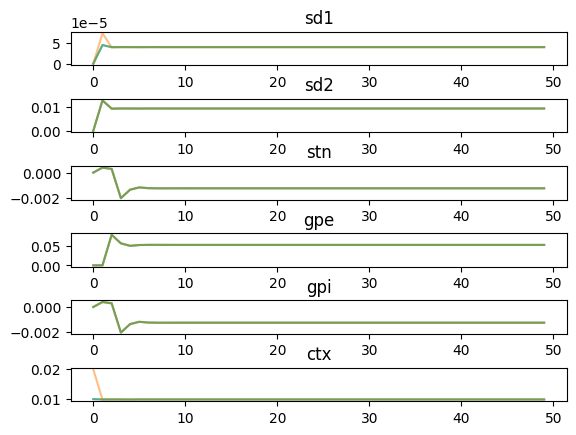

In [67]:
bg = b_ganglia(3,50)

bg.run(49)
bg.display()

print(bg.a_gpi)

